8
(28, 28)


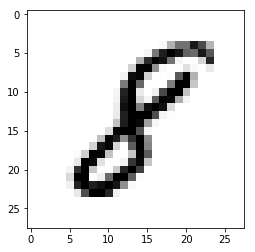

In [129]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

print(x_train[image_index].shape)

In [103]:
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [104]:
seed = 128
rng = np.random.RandomState(seed)

# Input

In [106]:
train = pd.read_csv(os.path.join('Train_UQcUa52', 'train.csv'))
test = pd.read_csv(os.path.join('Train_UQcUa52', 'Test.csv'))

sample_submission = pd.read_csv(os.path.join('Train_UQcUa52', 'Sample.csv'))

train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


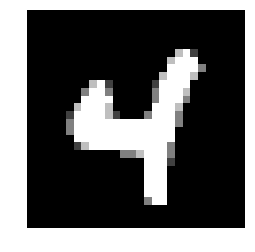

In [109]:
import matplotlib.pyplot as pylab
img_name = rng.choice(train.filename)
filepath = os.path.join('Train_UQcUa52', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [112]:
x_train.shape

(60000, 28, 28)

In [113]:
img.shape


(28, 28)

# Data Set Creation

In [115]:
temp = []
for img_name in train.filename:
    image_path = os.path.join('Train_UQcUa52', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

temp = []
for img_name in test.filename:
    image_path = os.path.join('Train_UQcUa52', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


In [116]:
train_x.shape

(49000, 28, 28)

In [117]:
test_x.shape

(21000, 28, 28)

In [118]:
y = train.label

# Deep Learning

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x,y, test_size=0.33, random_state=42)

In [127]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])



x_train shape: (32830, 28, 28, 1)
Number of images in x_train 32830
Number of images in x_test 16170


In [132]:
# Importing the required Keras modules containing model and layers

from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
# Creating a Sequential Model and adding the layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

image_index = 2500

Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2963 - accuracy: 0.9147
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1417 - accuracy: 0.9572
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1083 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0903 - accuracy: 0.9718
Epoch 5/5
10000/10000 [==============================] - 1s 61us/sample - loss: 0.0787 - accuracy: 0.9765


In [133]:
z = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.0787 - accuracy: 0.9765


In [134]:
z

[0.07865251674414613, 0.9765]

# Preparing Test

In [135]:
def preTest(x_train):
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    x_train = x_train.astype('float32')
    x_train /= 255
    print('x_train shape:', x_train.shape)
    print('Number of images in x_train', x_train.shape[0])
    return x_train

In [175]:
xt = preTest(test_x)

x_train shape: (21000, 28, 28, 1)
Number of images in x_train 21000


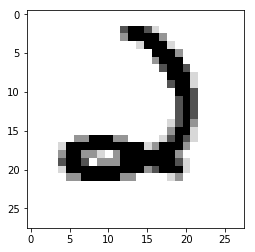

In [180]:
p = []
for i in range (0,21000):
    plt.imshow(xt[i].reshape(28, 28),cmap='Greys')
    predio = model.predict(xt[i].reshape(1, 28,28, 1))
    p.append(predio.argmax())

In [184]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [183]:
sample_submission.head()

,filename,label


In [185]:
sample_submission['filename'] = test['filename']
sample_submission['label']=p


In [186]:
sample_submission.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [188]:
sample_submission.to_csv('soln.csv',index=False)